# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | awjilah
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | abu samrah
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | yarensk
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | damghan
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | pinawa
Processing Record 19 of Set 1 | khandbari
Processing Record 20 of Set 1 | nioro
Processing Record 21 of Set 1 | great 

Processing Record 38 of Set 4 | kem
Processing Record 39 of Set 4 | lamu
Processing Record 40 of Set 4 | bluff
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | borovoy
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | bilokurakyne
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | roald
Processing Record 48 of Set 4 | jashpurnagar
Processing Record 49 of Set 4 | butaritari
Processing Record 0 of Set 5 | kahului
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | ambon
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | wagar
Processing Record 5 of Set 5 | enid
Processing Record 6 of Set 5 | floro
Processing Record 7 of Set 5 | yaan
Processing Record 8 of Set 5 | davila
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | derzhavinsk
Processing Record 11 of Set 5 | osa
Processing Record 12 of 

Processing Record 26 of Set 8 | privas
Processing Record 27 of Set 8 | tevaitoa
Processing Record 28 of Set 8 | quchan
Processing Record 29 of Set 8 | greenock
Processing Record 30 of Set 8 | ohaba lunga
City not found. Skipping...
Processing Record 31 of Set 8 | delvada
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | seguela
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | longyearbyen
Processing Record 36 of Set 8 | dubno
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | great yarmouth
Processing Record 39 of Set 8 | kasongo-lunda
Processing Record 40 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 41 of Set 8 | faya
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | yar-sale
Processing Record 44 of Set 8 | pak phanang
Processing Record 45 of Set 8 | fort nelson
Processing Record 46 of Set 8 | dubbo
Processing Record 47 of Set 8 | virginia beach
Processing Record 48 of Set 8 | a

Processing Record 10 of Set 12 | saint-philippe
Processing Record 11 of Set 12 | yermakovskoye
Processing Record 12 of Set 12 | palauig
Processing Record 13 of Set 12 | hornepayne
Processing Record 14 of Set 12 | narsaq
Processing Record 15 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 12 | evensk
Processing Record 17 of Set 12 | khormuj
City not found. Skipping...
Processing Record 18 of Set 12 | geraldton
Processing Record 19 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 20 of Set 12 | novobiryusinskiy
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | juelsminde
Processing Record 24 of Set 12 | palizada
Processing Record 25 of Set 12 | kosonsoy
Processing Record 26 of Set 12 | petrodvorets
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | ryotsu
Processing Record 29 of Set 12 | manta
Processing Record 30 of Set 12 | cascais

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,awjilah,29.1081,21.2869,294.33,19,5,1.51,LY,1670343317
1,port alfred,-33.5906,26.8910,296.03,75,10,0.89,ZA,1670343318
2,ushuaia,-54.8000,-68.3000,278.94,75,100,10.80,AR,1670343318
3,hasaki,35.7333,140.8333,277.71,79,74,5.15,JP,1670343319
4,abu samrah,35.3029,37.1841,287.02,62,7,2.73,SY,1670343321


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,awjilah,29.1081,21.2869,294.33,19,5,1.51,LY,1670343317
1,port alfred,-33.5906,26.8910,296.03,75,10,0.89,ZA,1670343318
2,ushuaia,-54.8000,-68.3000,278.94,75,100,10.80,AR,1670343318
3,hasaki,35.7333,140.8333,277.71,79,74,5.15,JP,1670343319
4,abu samrah,35.3029,37.1841,287.02,62,7,2.73,SY,1670343321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

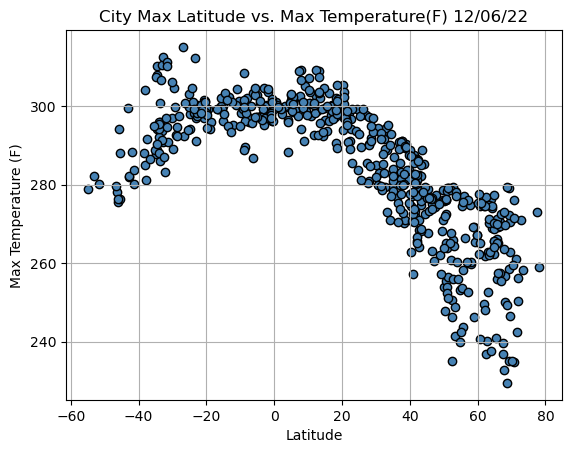

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='steelblue', edgecolor='black')


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Max Temperature(F) "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

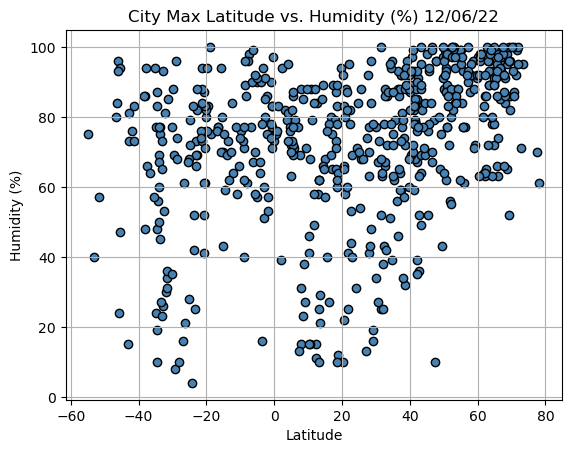

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

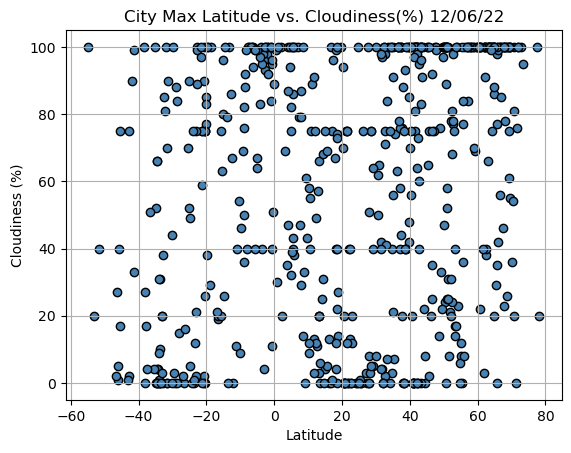

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

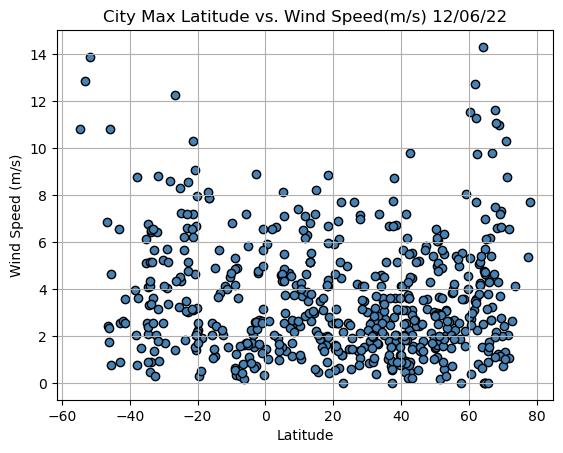

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='steelblue', edgecolor='black')


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed(m/s) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,awjilah,29.1081,21.2869,294.33,19,5,1.51,LY,1670343317
3,hasaki,35.7333,140.8333,277.71,79,74,5.15,JP,1670343319
4,abu samrah,35.3029,37.1841,287.02,62,7,2.73,SY,1670343321
5,hilo,19.7297,-155.0900,297.75,94,100,2.57,US,1670343321
6,sao filipe,14.8961,-24.4956,296.43,68,4,2.20,CV,1670343321


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,296.03,75,10,0.89,ZA,1670343318
2,ushuaia,-54.8000,-68.3000,278.94,75,100,10.80,AR,1670343318
10,new norfolk,-42.7826,147.0587,281.87,73,2,0.88,AU,1670343323
12,hermanus,-34.4187,19.2345,294.15,56,4,3.30,ZA,1670343324
25,isangel,-19.5500,169.2667,299.26,83,100,0.28,VU,1670343331


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Linear regression on Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temperature (r-value) is: {correlation}")
print(f"The the regression equation for latitude and max temperature is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.title("Correlation between Latitude & Max Temperature(F) \nNorthern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig5.png")
plt.show()

NameError: name 'st' is not defined

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE